# 1. <a id='toc1_'></a>[5° HackDays Comunidade DS](#toc0_)

---

**Table of contents**<a id='toc0_'></a>    
- 1. [5° HackDays Comunidade DS](#toc1_)    
- 2. [Imports](#toc2_)    
  - 2.1. [Libraries](#toc2_1_)    
  - 2.2. [Data](#toc2_2_)    
  - 2.3. [Helper Functions](#toc2_3_)    
- 3. [Data Exploration and problem comprehension](#toc3_)    
  - 3.1. [First data manipulations](#toc3_1_)    
    - 3.1.1. [Formatting data columns](#toc3_1_1_)    
    - 3.1.2. [Data description](#toc3_1_2_)    
      - 3.1.2.1. [Evaluations made by children](#toc3_1_2_1_)    
      - 3.1.2.2. [Checking the scoring for each evaluation criteria for all the dataset](#toc3_1_2_2_)    
      - 3.1.2.3. [Checking the scoring filtering for people over 12 years old](#toc3_1_2_3_)    
  - 3.2. [Formatting the categorical features](#toc3_2_)    
      - 3.2.1.1. ['gender'](#toc3_2_1_1_)    
      - 3.2.1.2. ['customer_type'](#toc3_2_1_2_)    
      - 3.2.1.3. ['type of purchase'](#toc3_2_1_3_)    
      - 3.2.1.4. ['store_size'](#toc3_2_1_4_)    
      - 3.2.1.5. ['satisfaction' (target feature)](#toc3_2_1_5_)    
  - 3.3. [Sticking only with numeric variables](#toc3_3_)    
- 4. [Feature Engineering and Hypothesis Creation](#toc4_)    
  - 4.1. [Hypothesis Testing](#toc4_1_)    
      - 4.1.1.1. [H01. loyal clients are more satisfied - TRUE](#toc4_1_1_1_)    
      - 4.1.1.2. [H02. bigger store have more unsatisfied customers - FALSE](#toc4_1_1_2_)    
      - 4.1.1.3. [H03. women are more satisfied - FALSE](#toc4_1_1_3_)    
      - 4.1.1.4. [H04. delivery delay - TRUE](#toc4_1_1_4_)    
      - 4.1.1.5. [H05. wifi - TRUE](#toc4_1_1_5_)    
      - 4.1.1.6. [H06. open/close time - FALSE](#toc4_1_1_6_)    
      - 4.1.1.7. [H07. online purchase - TRUE](#toc4_1_1_7_)    
      - 4.1.1.8. [H08. store location - FALSE](#toc4_1_1_8_)    
      - 4.1.1.9. [H09. toilet_cleaning](#toc4_1_1_9_)    
      - 4.1.1.10. [H10. dressing_room](#toc4_1_1_10_)    
      - 4.1.1.11. [H111. waiting_room](#toc4_1_1_11_)    
      - 4.1.1.12. [H12. kids_entertainment](#toc4_1_1_12_)    
      - 4.1.1.13. [H13. seller_service](#toc4_1_1_13_)    
      - 4.1.1.14. [H14. showroom](#toc4_1_1_14_)    
      - 4.1.1.15. [H15. self-store](#toc4_1_1_15_)    
      - 4.1.1.16. [H16. purchase_service](#toc4_1_1_16_)    
      - 4.1.1.17. [H17. store_service](#toc4_1_1_17_)    
      - 4.1.1.18. [H18. cleanliness](#toc4_1_1_18_)    
      - 4.1.1.19. [H19. more distance](#toc4_1_1_19_)    
      - 4.1.1.20. [H20. is_gift](#toc4_1_1_20_)    
      - 4.1.1.21. [H21. is_gift and delay](#toc4_1_1_21_)    
  - 4.2. [Making new features](#toc4_2_)    
    - 4.2.1. [Mean score per sale](#toc4_2_1_)    
  - 4.3. [More hypothesis testing](#toc4_3_)    
      - 4.3.1.1. [H22. Clients with average score above 3 are satisfied - TRUE](#toc4_3_1_1_)    
      - 4.3.1.2. [Age slices](#toc4_3_1_2_)    
- 5. [Data Selection and filtering](#toc5_)    
- 6. [Exploratory Data Analysis](#toc6_)    
- 7. [Data Preparation for modelling](#toc7_)    
- 8. [Model implementation](#toc8_)    
  - 8.1. [RandomForestClassifier](#toc8_1_)    
  - 8.2. [XGBoost](#toc8_2_)    
  - 8.3. [LGBMClassifier](#toc8_3_)    
  - 8.4. [CatBoostClassifier](#toc8_4_)    
- 9. [Hyperparameter Fine-Tuning](#toc9_)    
  - 9.1. [LightGBM](#toc9_1_)    
- 10. [Model Deployment](#toc10_)    
  - 10.1. [Test data pre-processing](#toc10_1_)    
  - 10.2. [Predictions](#toc10_2_)    
    - 10.2.1. [RandomForestClassifier](#toc10_2_1_)    
    - 10.2.2. [XGBoost](#toc10_2_2_)    
    - 10.2.3. [LightGBM](#toc10_2_3_)    
    - 10.2.4. [CatBoostClassifier](#toc10_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[Imports](#toc0_)


## 2.1. <a id='toc2_1_'></a>[Libraries](#toc0_)

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

from scipy import stats

from sklearn               import  model_selection as ms
from sklearn               import  preprocessing   as pp
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics       import accuracy_score, confusion_matrix, classification_report, precision_score

from sklearn.ensemble      import RandomForestClassifier
from sklearn.neighbors     import KNeighborsClassifier
from xgboost               import XGBClassifier
from catboost              import CatBoostClassifier
import lightgbm as lgb

warnings.filterwarnings( 'ignore' )
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style('dark')
pd.options.display.max_columns = None
pd.options.display.max_rows = 40

## 2.2. <a id='toc2_2_'></a>[Data](#toc0_)

In [3]:
data_path = '~/repos/Kaggle_InStyleNPS/data/'

In [4]:
data = pd.read_csv(data_path+'train.csv', low_memory=False)
test_data = pd.read_csv(data_path+'test.csv', low_memory=False)

## 2.3. <a id='toc2_3_'></a>[Helper Functions](#toc0_)

In [5]:
def change_case(x):
    output=[]
    for i in x:
        res=i.replace(' ', '_')
        res=res.lower()
        output.append(res)
    
    return output

# 3. <a id='toc3_'></a>[Data Exploration and problem comprehension](#toc0_)

## 3.1. <a id='toc3_1_'></a>[First data manipulations](#toc0_)

### 3.1.1. <a id='toc3_1_1_'></a>[Formatting data columns](#toc0_)

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns = change_case(data.columns)

### 3.1.2. <a id='toc3_1_2_'></a>[Data description](#toc0_)

In [8]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


In [9]:
data.shape

(103904, 24)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   gender                      103904 non-null  object 
 2   customer_type               103904 non-null  object 
 3   age                         103904 non-null  int64  
 4   type_of_purchase            103904 non-null  object 
 5   store_size                  103904 non-null  object 
 6   store_distance              103904 non-null  int64  
 7   instore_wifi                103904 non-null  int64  
 8   open/close_time_convenient  103904 non-null  int64  
 9   easy_of_online_shopping     103904 non-null  int64  
 10  store_location              103904 non-null  int64  
 11  toilet_cleaning             103904 non-null  int64  
 12  dressing_room               103904 non-null  int64  
 13  waiting_room  

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
store_distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
instore_wifi,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
open/close_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
easy_of_online_shopping,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
store_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
toilet_cleaning,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
dressing_room,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
waiting_room,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [12]:
data.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
instore_wifi                    0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self-store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

In [13]:
data[data['delivery_delay_in_minutes'].isna()]

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
213,49608,Female,Loyal Customer,38,Gift,Medium,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,Satisfied
1124,73442,Male,Loyal Customer,53,Personal,Medium,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,Neutral or Dissatisfaction
1529,71178,Male,Loyal Customer,39,Gift,Large,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,Neutral or Dissatisfaction
2004,72940,Female,disloyal Customer,26,Gift,Large,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,Neutral or Dissatisfaction
2108,116374,Female,Loyal Customer,24,Personal,Medium,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,Neutral or Dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal,Small,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,Neutral or Dissatisfaction
102384,71241,Male,Loyal Customer,58,Gift,Medium,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,Neutral or Dissatisfaction
102552,27684,Female,disloyal Customer,29,Gift,Medium,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,Neutral or Dissatisfaction
102960,36787,Male,Loyal Customer,58,Gift,Medium,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,Satisfied


In [14]:
data = data.fillna(0)

#### 3.1.2.1. <a id='toc3_1_2_1_'></a>[Evaluations made by children](#toc0_)

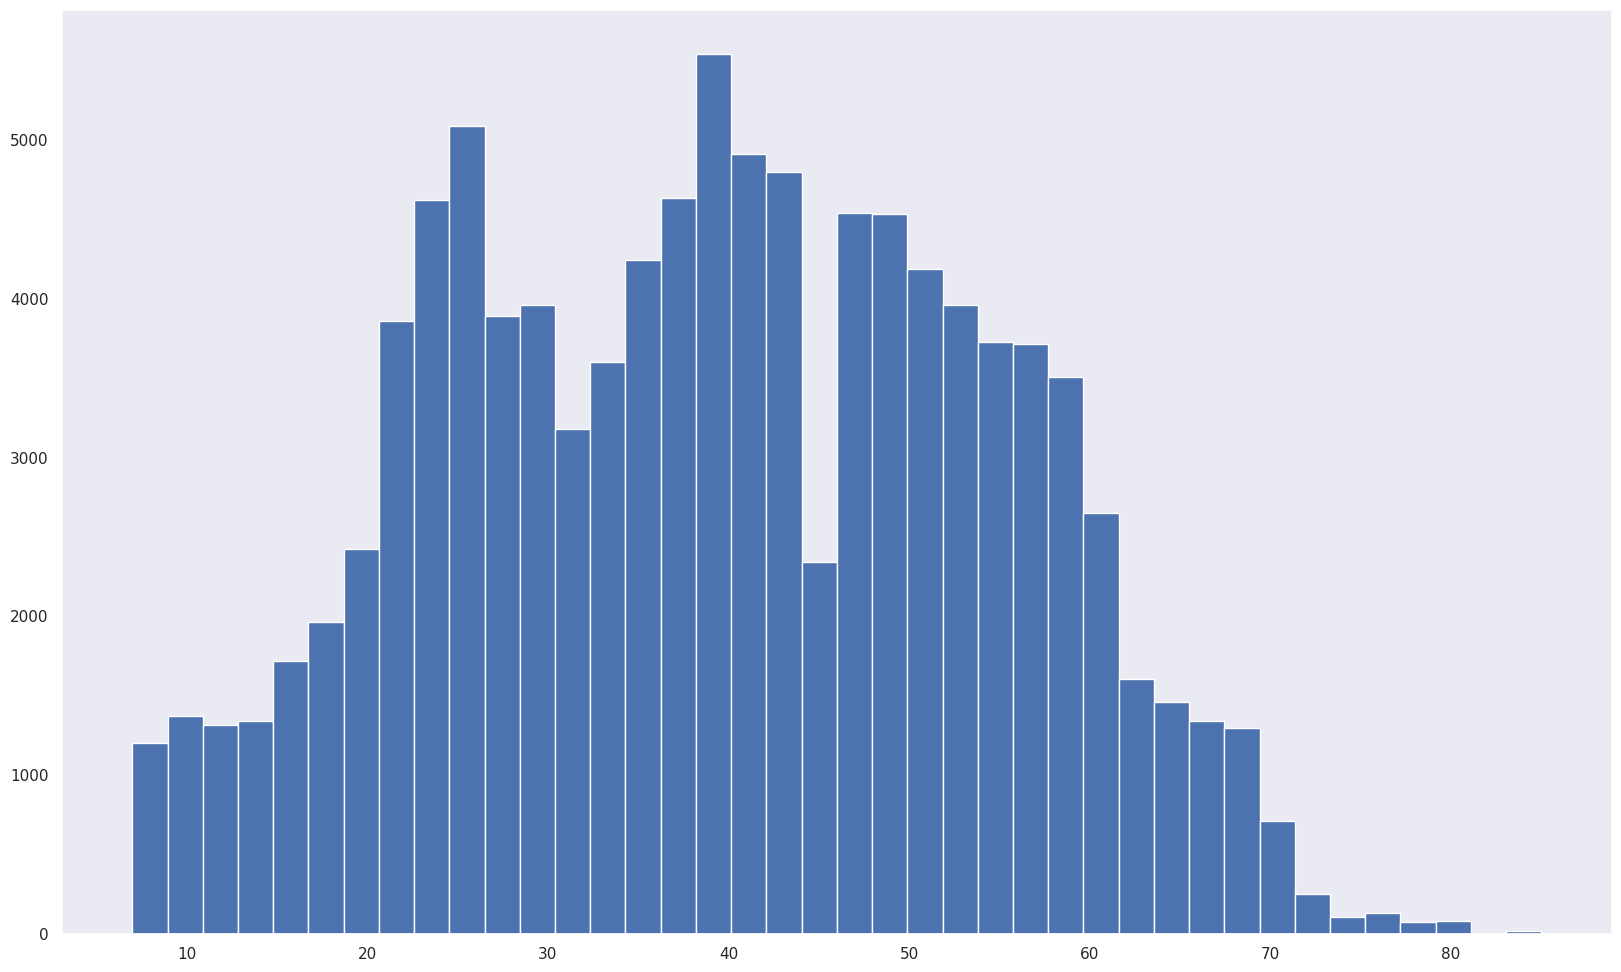

In [15]:
plt.hist(data['age'], bins=40);

In [16]:
data[data['age'] < 12]

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
20,39076,Male,Loyal Customer,9,Gift,Medium,1174,2,4,2,4,2,2,1,2,1,5,3,4,3,2,0,4.0,Neutral or Dissatisfaction
106,37373,Male,disloyal Customer,11,Gift,Medium,972,1,1,1,3,1,1,1,1,4,3,4,2,1,1,0,0.0,Neutral or Dissatisfaction
122,8256,Male,Loyal Customer,11,Personal,Medium,335,1,5,1,3,3,1,3,3,4,2,4,5,5,3,0,0.0,Neutral or Dissatisfaction
129,45561,Male,Loyal Customer,8,Gift,Medium,1304,4,4,4,4,4,4,4,4,2,2,4,2,1,4,0,0.0,Satisfied
177,14030,Male,disloyal Customer,8,Gift,Large,1117,4,3,4,3,3,4,3,3,4,5,4,4,3,3,0,7.0,Neutral or Dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103744,127680,Female,Loyal Customer,10,Personal,Small,2153,1,5,1,2,3,1,4,3,5,3,5,5,4,3,5,2.0,Neutral or Dissatisfaction
103783,41688,Male,Loyal Customer,11,Personal,Medium,936,2,4,2,4,3,2,3,3,3,5,5,5,5,3,44,62.0,Neutral or Dissatisfaction
103851,112270,Male,disloyal Customer,8,Gift,Medium,1036,3,3,3,1,5,3,5,5,3,4,4,5,4,5,1,0.0,Neutral or Dissatisfaction
103862,69728,Female,Loyal Customer,8,Personal,Medium,1372,3,4,3,1,2,3,2,2,3,3,3,5,4,2,0,13.0,Neutral or Dissatisfaction


Há 3255 avaliações realizadas por crianças com menos de 12.

#### 3.1.2.2. <a id='toc3_1_2_2_'></a>[Checking the scoring for each evaluation criteria for all the dataset](#toc0_)

In [17]:
cols_order = ['instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness']

In [18]:
notas = pd.DataFrame(data[cols_order].mean().round(2), columns=['mean'])

In [19]:
notas

,mean
instore_wifi,2.73
open/close_time_convenient,3.06
easy_of_online_shopping,2.76
store_location,2.98
toilet_cleaning,3.20
dressing_room,3.25
waiting_room,3.44
kids_entertainment,3.36
seller_service,3.38
showroom,3.35


In [20]:
notas.sort_values('mean')

,mean
instore_wifi,2.73
easy_of_online_shopping,2.76
store_location,2.98
open/close_time_convenient,3.06
toilet_cleaning,3.20
dressing_room,3.25
cleanliness,3.29
purchase_service,3.30
showroom,3.35
kids_entertainment,3.36


As notas médias ordenadas de menor para maior estão a seguinte forma:

    - 'instore_wifi', 
    - 'easy_of_online_shopping', 
    - 'store_location', 
    - 'open/close_time_convenient', 
    - 'toilet_cleaning', 
    - 'dressing_room', 
    - 'cleanliness', 
    - 'purchase_service', 
    - 'showroom', 
    - 'kids_entertainment', 
    - 'seller_service', 
    - 'waiting_room', 
    - 'self-store', 
    - 'store_service'

#### 3.1.2.3. <a id='toc3_1_2_3_'></a>[Checking the scoring filtering for people over 12 years old](#toc0_)

In [21]:
data_plus12 = data[data['age'] >= 12]

In [22]:
notas_plus12 = pd.DataFrame(data_plus12[cols_order].mean().round(2), columns=['mean'])

In [23]:
notas_plus12.sort_values('mean')

,mean
instore_wifi,2.74
easy_of_online_shopping,2.76
store_location,2.98
open/close_time_convenient,3.05
toilet_cleaning,3.21
dressing_room,3.27
cleanliness,3.30
purchase_service,3.31
showroom,3.36
kids_entertainment,3.37


## 3.2. <a id='toc3_2_'></a>[Formatting the categorical features](#toc0_)

In [24]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


#### 3.2.1.1. <a id='toc3_2_1_1_'></a>['gender'](#toc0_)

In [25]:
data['is_female'] = data['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [26]:
data[['gender', 'is_female']].sample(10)

,gender,is_female
59476,Male,0
58021,Male,0
21334,Male,0
85888,Female,1
70199,Male,0
14622,Female,1
19861,Female,1
67375,Male,0
70735,Male,0
33333,Male,0


#### 3.2.1.2. <a id='toc3_2_1_2_'></a>['customer_type'](#toc0_)

In [27]:
data.customer_type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [28]:
data['is_loyal'] = data['customer_type'].apply(lambda x: 1 if (x == 'Loyal Customer') else 0)

In [29]:
data[['customer_type', 'is_loyal']].sample(10)

,customer_type,is_loyal
89100,Loyal Customer,1
80331,Loyal Customer,1
34439,Loyal Customer,1
64923,Loyal Customer,1
82404,Loyal Customer,1
53306,Loyal Customer,1
73092,Loyal Customer,1
57620,Loyal Customer,1
36233,disloyal Customer,0
47457,Loyal Customer,1


#### 3.2.1.3. <a id='toc3_2_1_3_'></a>['type of purchase'](#toc0_)

In [30]:
data['type_of_purchase'].unique()

array(['Personal', 'Gift'], dtype=object)

In [31]:
data['is_gift'] =  data['type_of_purchase'].apply(lambda x: 1 if x == 'Gift' else 0)

In [32]:
data[['type_of_purchase', 'is_gift']].sample(10)

,type_of_purchase,is_gift
10398,Gift,1
70196,Gift,1
83453,Personal,0
79115,Gift,1
24953,Gift,1
69885,Gift,1
46641,Personal,0
10434,Gift,1
72993,Personal,0
84208,Gift,1


#### 3.2.1.4. <a id='toc3_2_1_4_'></a>['store_size'](#toc0_)

In [33]:
data['store_size'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [34]:
data['store_size_numeric'] = data['store_size'].apply(lambda x: 1 if x == 'Small' else 2 if x == 'Medium' else 3)

In [35]:
data[['store_size', 'store_size_numeric']].sample(10)

,store_size,store_size_numeric
31933,Large,3
95963,Large,3
78785,Large,3
34213,Medium,2
56989,Medium,2
74199,Medium,2
82990,Large,3
77253,Medium,2
95287,Large,3
33504,Large,3


#### 3.2.1.5. <a id='toc3_2_1_5_'></a>['satisfaction' (target feature)](#toc0_)

In [36]:
data['satisfaction'].unique()

array(['Neutral or Dissatisfaction', 'Satisfied'], dtype=object)

In [37]:
data['is_satisfied'] = data['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

In [38]:
data[['satisfaction', 'is_satisfied']].sample(10)

,satisfaction,is_satisfied
93696,Satisfied,1
38466,Satisfied,1
44121,Neutral or Dissatisfaction,0
91797,Neutral or Dissatisfaction,0
18647,Satisfied,1
34816,Satisfied,1
33914,Satisfied,1
99954,Satisfied,1
81768,Neutral or Dissatisfaction,0
83388,Satisfied,1


## 3.3. <a id='toc3_3_'></a>[Sticking only with numeric variables](#toc0_)

In [39]:
data

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction,0,1,0,1,0
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction,0,0,1,3,0
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied,1,1,1,3,1
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction,1,1,1,3,0
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Gift,Medium,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Neutral or Dissatisfaction,1,0,1,2,0
103900,73097,Male,Loyal Customer,49,Gift,Large,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Satisfied,0,1,1,3,1
103901,68825,Male,disloyal Customer,30,Gift,Large,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,Neutral or Dissatisfaction,0,0,1,3,0
103902,54173,Female,disloyal Customer,22,Gift,Medium,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Neutral or Dissatisfaction,1,0,1,2,0


In [40]:
num_data = data.select_dtypes(include=np.number)

In [41]:
num_data

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0


# 4. <a id='toc4_'></a>[Feature Engineering and Hypothesis Creation](#toc0_)

In [42]:
df = num_data.copy()

In [43]:
# df.to_csv('/home/bruno/repos/Kaggle_InStyleNPS/data/train_numeric.csv', index=False)
# df = pd.read_csv('/home/bruno/repos/Kaggle_InStyleNPS/data/train_numeric.csv', low_memory=False)

In [44]:
df

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0


## 4.1. <a id='toc4_1_'></a>[Hypothesis Testing](#toc0_)

#### 4.1.1.1. <a id='toc4_1_1_1_'></a>[H01. loyal clients are more satisfied - TRUE](#toc0_)

In [45]:
data[['is_satisfied', 'is_loyal']].groupby('is_loyal').mean().reset_index()

,is_loyal,is_satisfied
0,0,0.236658
1,1,0.477291


#### 4.1.1.2. <a id='toc4_1_1_2_'></a>[H02. bigger store have more unsatisfied customers - FALSE](#toc0_)

In [46]:
data[['is_satisfied', 'store_size_numeric']].groupby('store_size_numeric').mean().reset_index()

,store_size_numeric,is_satisfied
0,1,0.246064
1,2,0.186138
2,3,0.694251


#### 4.1.1.3. <a id='toc4_1_1_3_'></a>[H03. women are more satisfied - FALSE](#toc0_)

#### 4.1.1.4. <a id='toc4_1_1_4_'></a>[H04. delivery delay - TRUE](#toc0_)

In [47]:
df[['is_satisfied', 'delivery_delay_in_minutes']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,delivery_delay_in_minutes
0,0,17.074594
1,1,12.594892


#### 4.1.1.5. <a id='toc4_1_1_5_'></a>[H05. wifi - TRUE](#toc0_)

In [48]:
df[['is_satisfied', 'instore_wifi']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,instore_wifi
0,0,2.399633
1,1,3.161288


#### 4.1.1.6. <a id='toc4_1_1_6_'></a>[H06. open/close time - FALSE](#toc0_)

In [49]:
df[['is_satisfied', 'open/close_time_convenient']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,open/close_time_convenient
0,0,3.129112
1,1,2.970305


#### 4.1.1.7. <a id='toc4_1_1_7_'></a>[H07. online purchase - TRUE](#toc0_)

In [50]:
df[['is_satisfied', 'easy_of_online_shopping']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,easy_of_online_shopping
0,0,2.546850
1,1,3.031582


#### 4.1.1.8. <a id='toc4_1_1_8_'></a>[H08. store location - FALSE](#toc0_)

In [51]:
df[['is_satisfied', 'store_location']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,store_location
0,0,2.976121
1,1,2.977879


#### 4.1.1.9. <a id='toc4_1_1_9_'></a>[H09. toilet_cleaning](#toc0_)

In [52]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### 4.1.1.10. <a id='toc4_1_1_10_'></a>[H10. dressing_room](#toc0_)

In [53]:
df[['is_satisfied', 'dressing_room']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,dressing_room
0,0,2.656125
1,1,4.027474


#### 4.1.1.11. <a id='toc4_1_1_11_'></a>[H111. waiting_room](#toc0_)

In [54]:
df[['is_satisfied', 'waiting_room']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,waiting_room
0,0,3.036295
1,1,3.966530


#### 4.1.1.12. <a id='toc4_1_1_12_'></a>[H12. kids_entertainment](#toc0_)

In [55]:
df[['is_satisfied', 'kids_entertainment']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,kids_entertainment
0,0,2.894156
1,1,3.964931


#### 4.1.1.13. <a id='toc4_1_1_13_'></a>[H13. seller_service](#toc0_)

In [56]:
df[['is_satisfied', 'seller_service']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,seller_service
0,0,3.019158
1,1,3.857324


#### 4.1.1.14. <a id='toc4_1_1_14_'></a>[H14. showroom](#toc0_)

In [57]:
df[['is_satisfied', 'showroom']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,showroom
0,0,2.990812
1,1,3.822143


#### 4.1.1.15. <a id='toc4_1_1_15_'></a>[H15. self-store](#toc0_)

In [58]:
df[['is_satisfied', 'self-store']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,self-store
0,0,3.375991
1,1,3.966396


#### 4.1.1.16. <a id='toc4_1_1_16_'></a>[H16. purchase_service](#toc0_)

In [59]:
df[['is_satisfied', 'purchase_service']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,purchase_service
0,0,3.042952
1,1,3.646041


#### 4.1.1.17. <a id='toc4_1_1_17_'></a>[H17. store_service](#toc0_)

In [60]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### 4.1.1.18. <a id='toc4_1_1_18_'></a>[H18. cleanliness](#toc0_)

In [61]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### 4.1.1.19. <a id='toc4_1_1_19_'></a>[H19. more distance](#toc0_)

In [62]:
df[['is_satisfied', 'store_distance']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,store_distance
0,0,928.919971
1,1,1530.140255


#### 4.1.1.20. <a id='toc4_1_1_20_'></a>[H20. is_gift](#toc0_)

In [63]:
df[['is_satisfied', 'is_gift']].groupby('is_gift').mean().reset_index()

,is_gift,is_satisfied
0,0,0.101678
1,1,0.582597


#### 4.1.1.21. <a id='toc4_1_1_21_'></a>[H21. is_gift and delay](#toc0_)

In [64]:
df_aux = df[['is_satisfied', 'is_gift', 'delivery_delay_in_minutes']]
df_aux['is_delayed'] = df_aux['delivery_delay_in_minutes'].apply(lambda x: 1 if x>0 else 0)
df_aux[['is_satisfied', 'is_gift', 'is_delayed']].groupby(['is_gift', 'is_delayed']).mean().reset_index()

,is_gift,is_delayed,is_satisfied
0,0,0,0.130763
1,0,1,0.063482
2,1,0,0.628246
3,1,1,0.524386


## 4.2. <a id='toc4_2_'></a>[Making new features](#toc0_)

### 4.2.1. <a id='toc4_2_1_'></a>[Mean score per sale](#toc0_)

In [65]:
df['mean_score'] = df[['instore_wifi','open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness']].mean(axis=1).round(2)

In [66]:
df

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,3.86
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0,2.29
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1,3.71
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0,3.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0,2.21
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1,4.36
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0,3.07
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0,2.29


## 4.3. <a id='toc4_3_'></a>[More hypothesis testing](#toc0_)

#### 4.3.1.1. <a id='toc4_3_1_1_'></a>[H22. Clients with average score above 3 are satisfied - TRUE](#toc0_)

In [127]:
df[['is_satisfied', 'mean_score']].groupby('is_satisfied').agg(['mean', 'std']).reset_index()

is_satisfied mean_score          
                     mean       std
0            0   2.953584  0.563747
1            1   3.616221  0.588586

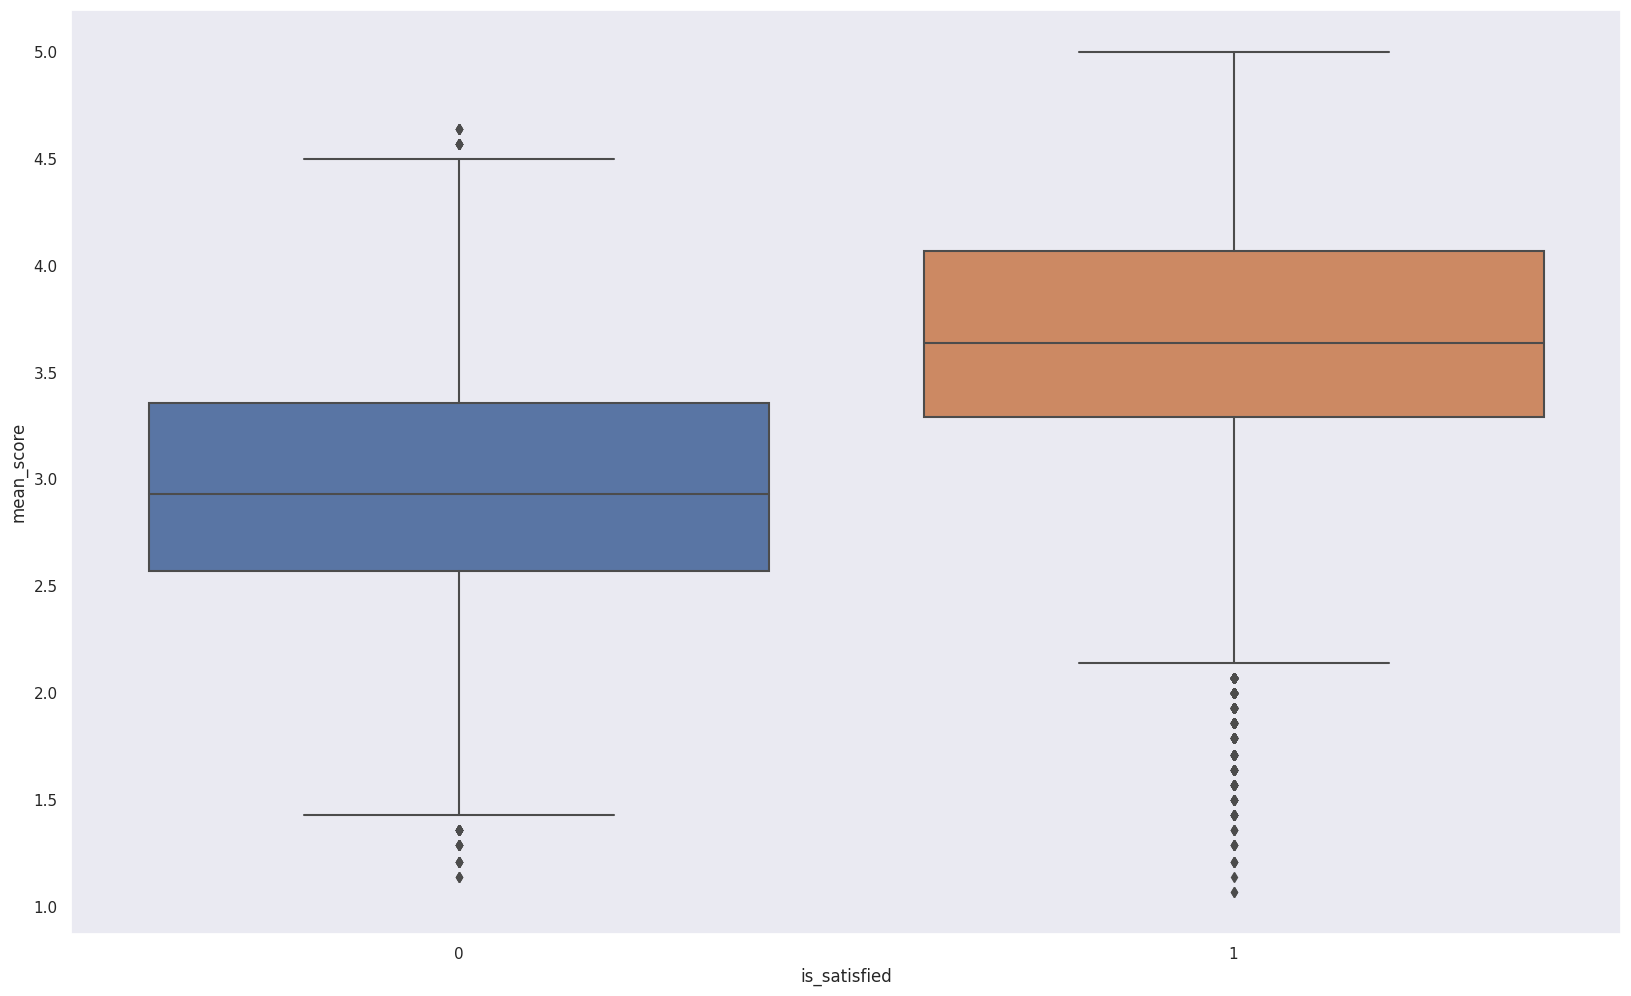

In [68]:
sns.boxplot(data=df, x='is_satisfied', y='mean_score');

#### 4.3.1.2. <a id='toc4_3_1_2_'></a>[Age slices](#toc0_)

In [69]:
df['age_category'] = df['age'].apply(lambda x: 1 if x < 18 else 2 if x < 30 else 3 if x < 45 else 4 if x < 60 else 5)

In [70]:
df[['age', 'age_category']].sample(10)

,age,age_category
43299,12,1
58842,62,5
79957,8,1
43999,39,3
57880,27,2
77695,42,3
25344,54,4
12244,40,3
101666,35,3
43601,24,2


In [71]:
df[['is_satisfied', 'age_category']].groupby('age_category').mean().reset_index()

,age_category,is_satisfied
0,1,0.163914
1,2,0.345806
2,3,0.475488
3,4,0.574865
4,5,0.271221


# 5. <a id='toc5_'></a>[Data Selection and filtering](#toc0_)

In [72]:
df.head()

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score,age_category
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,3.86,1
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0,2.29,2
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1,3.71,2
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0,3.00,2
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1,3.50,5


In [73]:
df.columns

Index(['id', 'age', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes', 'is_female',
       'is_loyal', 'is_gift', 'store_size_numeric', 'is_satisfied',
       'mean_score', 'age_category'],
      dtype='object')

In [74]:
selected_columns = ['id', 'age', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness', 'delivery_delay_in_minutes', 
       'is_loyal', 'is_gift', 'store_size_numeric', 'is_satisfied',
       'mean_score']

data_select = df[selected_columns]

In [75]:
data_select

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,delivery_delay_in_minutes,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,3.86
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0,1,3,0,2.29
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1,1,3,1,3.71
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,1,1,3,0,3.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,3,1,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0.0,0,1,2,0,2.21
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,1,3,1,4.36
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,14.0,0,1,3,0,3.07
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,1,2,0,2.29


# 6. <a id='toc6_'></a>[Exploratory Data Analysis](#toc0_)

In [76]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction,0,1,0,1,0
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction,0,0,1,3,0
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied,1,1,1,3,1
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction,1,1,1,3,0
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied,0,1,1,3,1


In [77]:
df.head()

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score,age_category
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,3.86,1
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0,2.29,2
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1,3.71,2
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0,3.00,2
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1,3.50,5


In [78]:
data_select.head()

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,delivery_delay_in_minutes,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,3.86
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0,1,3,0,2.29
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1,1,3,1,3.71
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,1,1,3,0,3.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,3,1,3.50


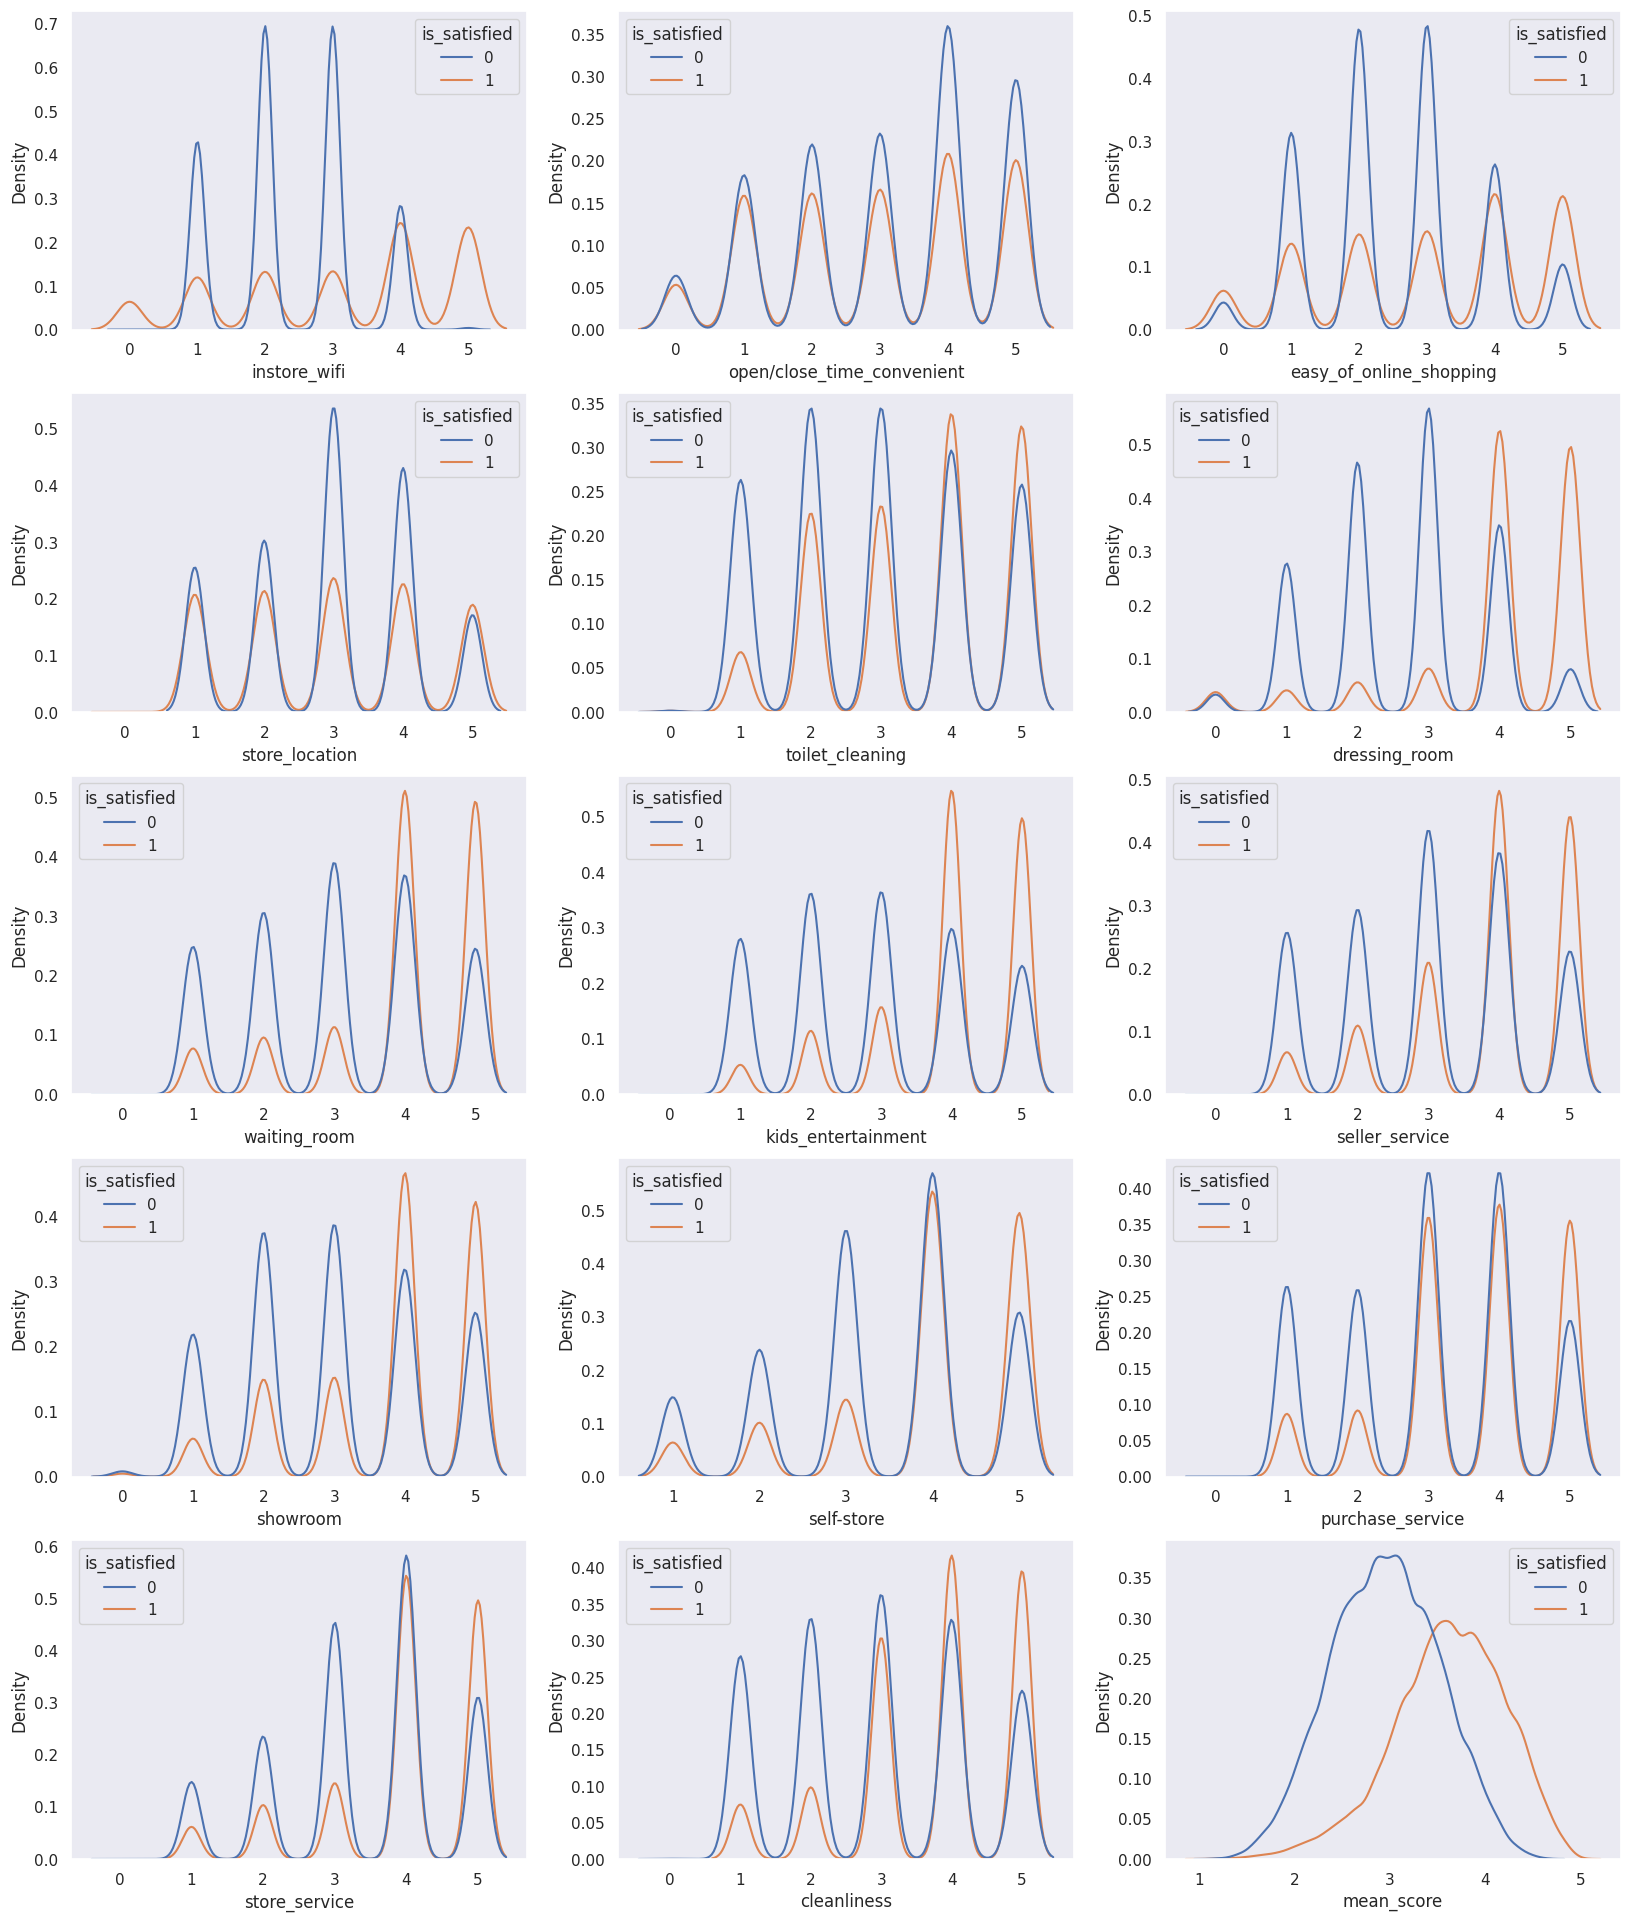

In [118]:
plt.rcParams['figure.figsize'] = [20, 24]
fig, axs = plt.subplots(ncols=3, nrows=5);
sns.kdeplot(x='instore_wifi', hue='is_satisfied', data=data, ax=axs[0,0])
sns.kdeplot(x='open/close_time_convenient', hue='is_satisfied', data=data, ax=axs[0,1])
sns.kdeplot(x='easy_of_online_shopping', hue='is_satisfied', data=data, ax=axs[0,2])
sns.kdeplot(x='store_location', hue='is_satisfied', data=data, ax=axs[1,0])
sns.kdeplot(x='toilet_cleaning', hue='is_satisfied', data=data, ax=axs[1,1])
sns.kdeplot(x='dressing_room', hue='is_satisfied', data=data, ax=axs[1,2])
sns.kdeplot(x='waiting_room', hue='is_satisfied', data=data, ax=axs[2,0])
sns.kdeplot(x='kids_entertainment', hue='is_satisfied', data=data, ax=axs[2,1])
sns.kdeplot(x='seller_service', hue='is_satisfied', data=data, ax=axs[2,2])
sns.kdeplot(x='showroom', hue='is_satisfied', data=data, ax=axs[3,0])
sns.kdeplot(x='self-store', hue='is_satisfied', data=data, ax=axs[3,1])
sns.kdeplot(x='purchase_service', hue='is_satisfied', data=data, ax=axs[3,2])
sns.kdeplot(x='store_service', hue='is_satisfied', data=data, ax=axs[4,0])
sns.kdeplot(x='cleanliness', hue='is_satisfied', data=data, ax=axs[4,1])
sns.kdeplot(x='mean_score', hue='is_satisfied', data=data_select, ax=axs[4,2]);

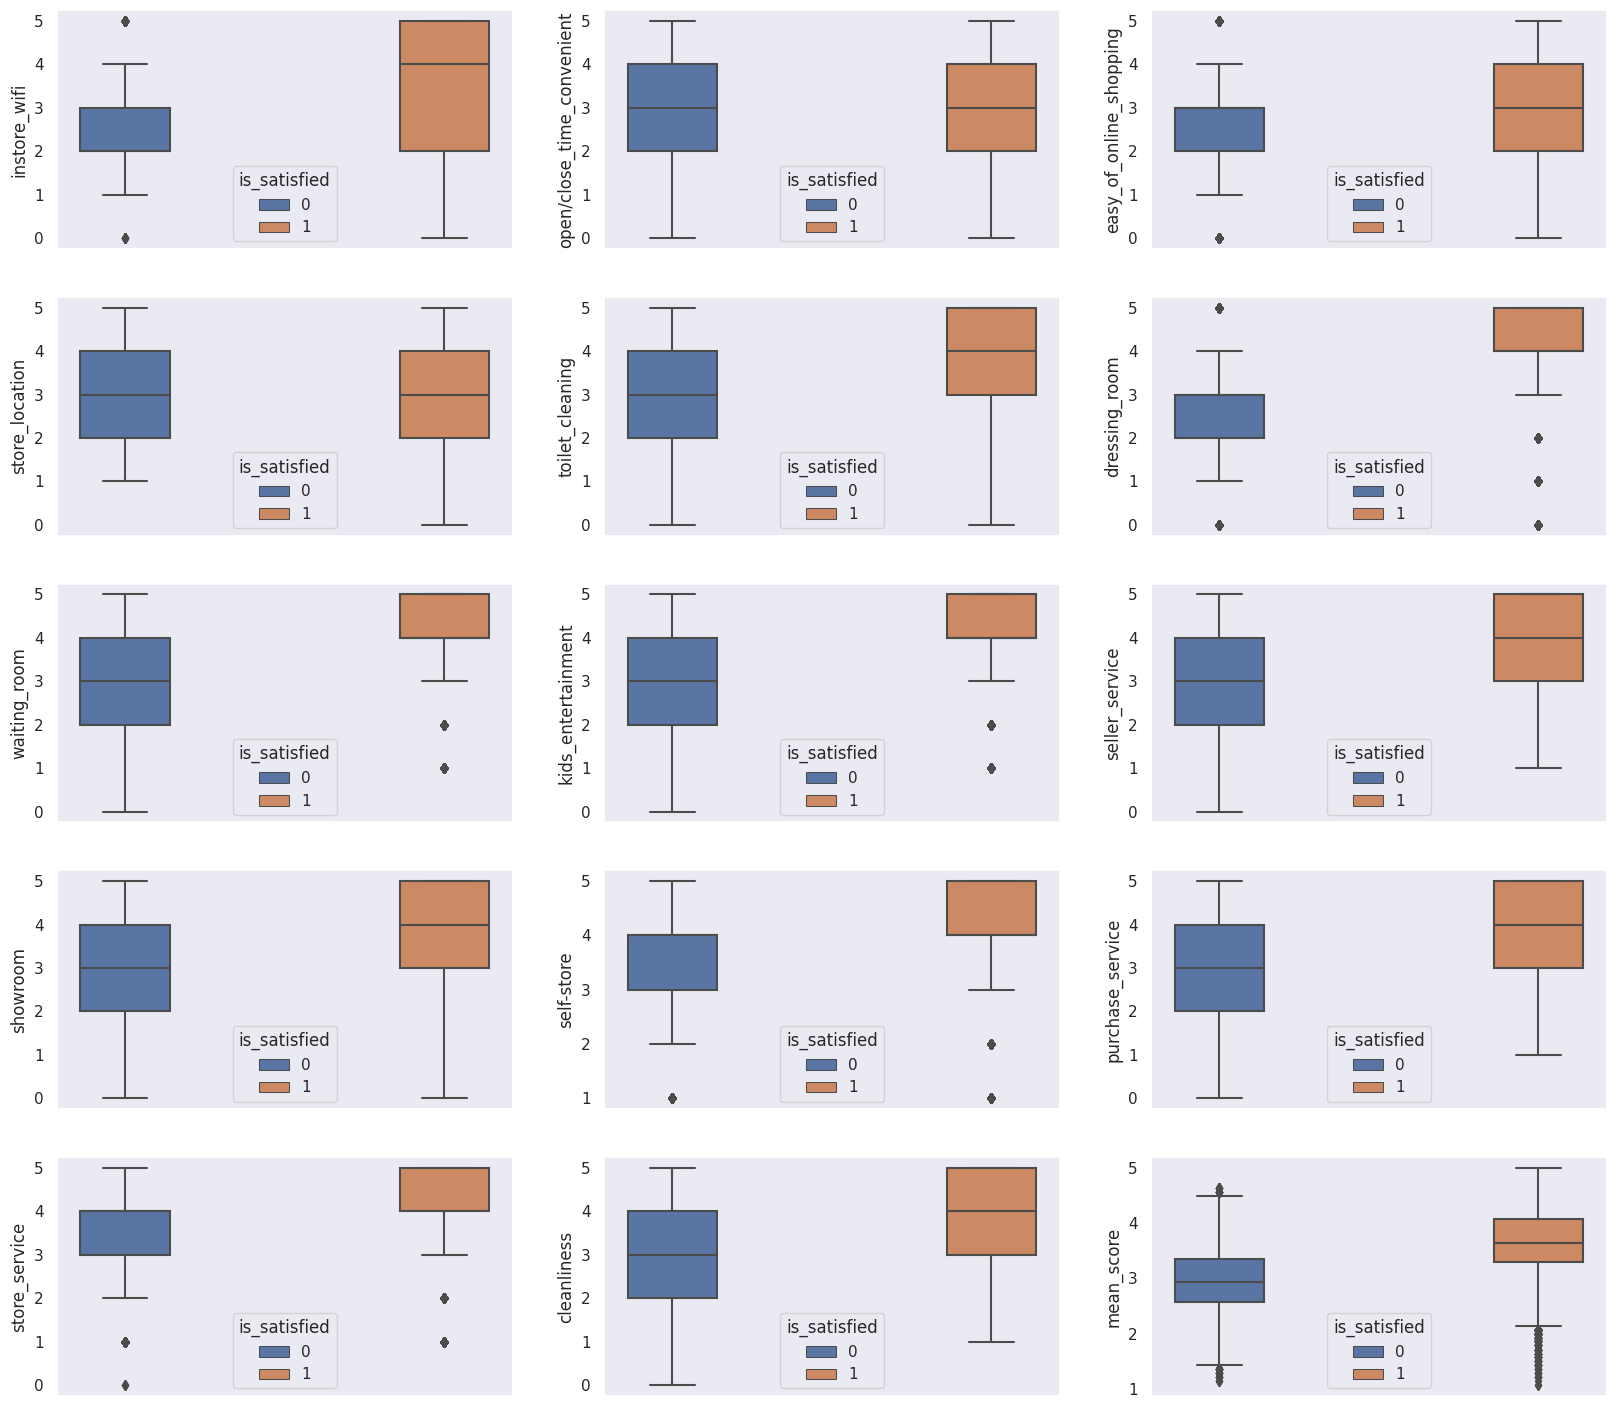

In [126]:
plt.rcParams['figure.figsize'] = [20, 18]
fig, axs = plt.subplots(ncols=3, nrows=5);
g1 = sns.boxplot(y='instore_wifi', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[0,0])
g1.set(xlabel=None)
g1.set(xticklabels=[])
g2 = sns.boxplot(y='open/close_time_convenient', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[0,1])
g2.set(xlabel=None)
g2.set(xticklabels=[])
g3 = sns.boxplot(y='easy_of_online_shopping', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[0,2])
g3.set(xlabel=None)
g3.set(xticklabels=[])
g4 = sns.boxplot(y='store_location', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[1,0])
g4.set(xlabel=None)
g4.set(xticklabels=[])
g5 = sns.boxplot(y='toilet_cleaning', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[1,1])
g5.set(xlabel=None)
g5.set(xticklabels=[])
g6 = sns.boxplot(y='dressing_room', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[1,2])
g6.set(xlabel=None)
g6.set(xticklabels=[])
g7 = sns.boxplot(y='waiting_room', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[2,0])
g7.set(xlabel=None)
g7.set(xticklabels=[])
g8 = sns.boxplot(y='kids_entertainment', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[2,1])
g8.set(xlabel=None)
g8.set(xticklabels=[])
g9 = sns.boxplot(y='seller_service', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[2,2])
g9.set(xlabel=None)
g9.set(xticklabels=[])
g10 = sns.boxplot(y='showroom', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[3,0])
g10.set(xlabel=None)
g10.set(xticklabels=[])
g11 = sns.boxplot(y='self-store', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[3,1])
g11.set(xlabel=None)
g11.set(xticklabels=[])
g12 = sns.boxplot(y='purchase_service', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[3,2])
g12.set(xlabel=None)
g12.set(xticklabels=[])
g13 = sns.boxplot(y='store_service', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[4,0])
g13.set(xlabel=None)
g13.set(xticklabels=[])
g14 = sns.boxplot(y='cleanliness', x='is_satisfied', hue='is_satisfied', data=data, ax=axs[4,1])
g14.set(xlabel=None)
g14.set(xticklabels=[])
g15 = sns.boxplot(y='mean_score', x='is_satisfied', hue='is_satisfied', data=data_select, ax=axs[4,2]);
g15.set(xlabel=None);
g15.set(xticklabels=[]);

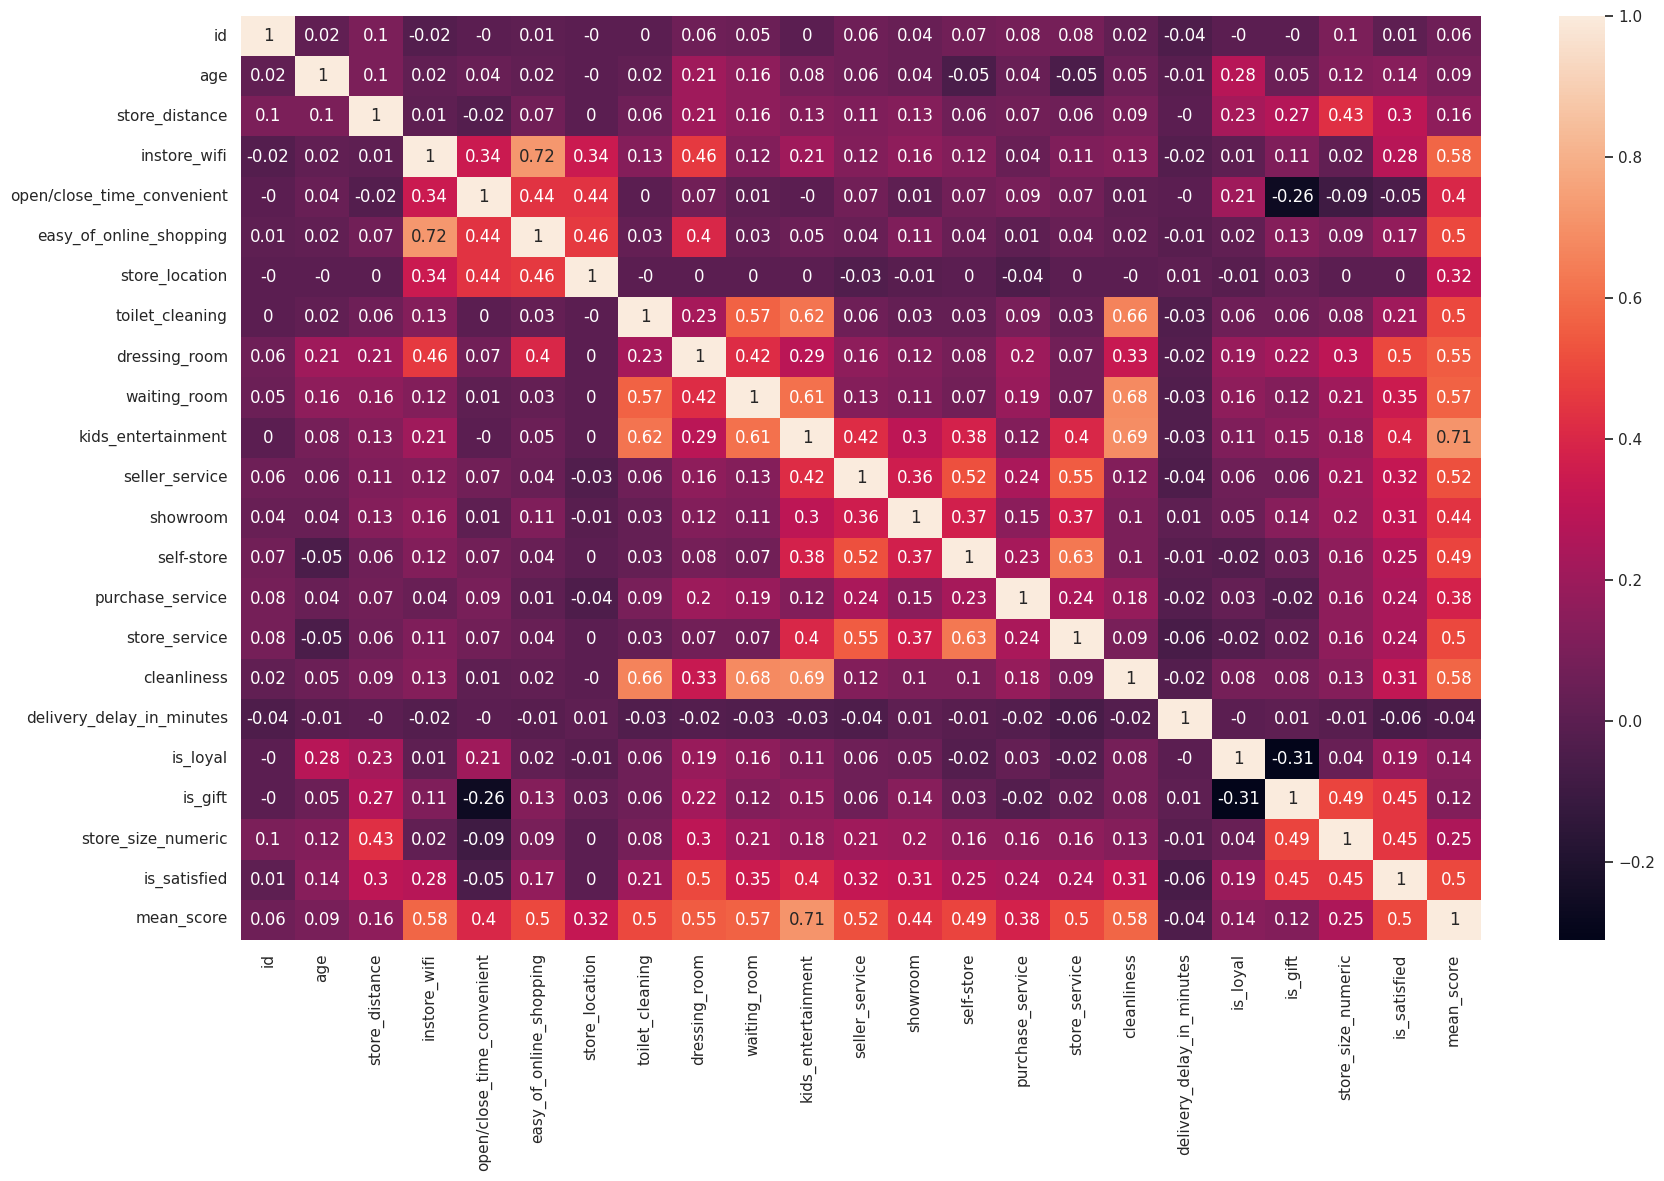

In [80]:
correlation = data_select.corr(method='pearson').round(2)
sns.heatmap(correlation, annot=True);

# 7. <a id='toc7_'></a>[Data Preparation for modelling](#toc0_)

In [81]:
data_prep = data_select.copy()

In [82]:
data_prep

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,delivery_delay_in_minutes,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,3.86
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0,1,3,0,2.29
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1,1,3,1,3.71
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,1,1,3,0,3.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,3,1,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0.0,0,1,2,0,2.21
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,1,3,1,4.36
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,14.0,0,1,3,0,3.07
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,1,2,0,2.29


In [83]:
rs = RobustScaler()
mms = MinMaxScaler()

In [84]:
data_prep.columns

Index(['id', 'age', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness',
       'delivery_delay_in_minutes', 'is_loyal', 'is_gift',
       'store_size_numeric', 'is_satisfied', 'mean_score'],
      dtype='object')

In [85]:
data_prep['id'] = mms.fit_transform(data_prep[['id']])
data_prep['age'] = mms.fit_transform(data_prep[['age']])
data_prep['store_distance'] = mms.fit_transform(data_prep[['store_distance']])
data_prep['delivery_delay_in_minutes'] = mms.fit_transform(data_prep[['delivery_delay_in_minutes']])
data_prep['store_size_numeric'] = mms.fit_transform(data_prep[['store_size_numeric']])
data_prep['mean_score'] = mms.fit_transform(data_prep[['mean_score']])

In [86]:
# data_prep['instore_wifi'] = mms.fit_transform(data_prep[['instore_wifi']])
# data_prep['open/close_time_convenient'] = mms.fit_transform(data_prep[['open/close_time_convenient']])
# data_prep['easy_of_online_shopping'] = mms.fit_transform(data_prep[['easy_of_online_shopping']])
# data_prep['store_location'] = mms.fit_transform(data_prep[['store_location']])
# data_prep['toilet_cleaning'] = mms.fit_transform(data_prep[['toilet_cleaning']])
# data_prep['dressing_room'] = mms.fit_transform(data_prep[['dressing_room']])
# data_prep['waiting_room'] = mms.fit_transform(data_prep[['waiting_room']])
# data_prep['kids_entertainment'] = mms.fit_transform(data_prep[['kids_entertainment']])
# data_prep['seller_service'] = mms.fit_transform(data_prep[['seller_service']])
# data_prep['showroom'] = mms.fit_transform(data_prep[['showroom']])
# data_prep['self-store'] = mms.fit_transform(data_prep[['self-store']])
# data_prep['purchase_service'] = mms.fit_transform(data_prep[['purchase_service']])
# data_prep['store_service'] = mms.fit_transform(data_prep[['store_service']])
# data_prep['cleanliness'] = mms.fit_transform(data_prep[['cleanliness']])

In [87]:
data_prep

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,delivery_delay_in_minutes,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,0.540280,0.076923,0.086632,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.011364,1,0,0.0,0,0.709924
1,0.038852,0.230769,0.041195,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0.003788,0,1,1.0,0,0.310433
2,0.847150,0.243590,0.224354,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.000000,1,1,1.0,1,0.671756
3,0.184980,0.230769,0.107229,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0.005682,1,1,1.0,0,0.491094
4,0.918532,0.692308,0.036955,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.000000,1,1,1.0,1,0.618321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.725059,0.205128,0.032512,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0.000000,0,1,0.5,0,0.290076
103900,0.562801,0.538462,0.467690,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.000000,1,1,1.0,1,0.837150
103901,0.529909,0.294872,0.396607,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0.008838,0,1,1.0,0,0.508906
103902,0.417096,0.192308,0.195679,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.000000,0,1,0.5,0,0.310433


# 8. <a id='toc8_'></a>[Model implementation](#toc0_)

In [88]:
dataset = data_prep.copy()

In [89]:
X = dataset.drop(['is_satisfied'], axis=1)
y = dataset['is_satisfied']

In [90]:
X_train, X_validation, y_train, y_validation = ms.train_test_split(X, y, test_size = 0.2, random_state=42)

## 8.1. <a id='toc8_1_'></a>[RandomForestClassifier](#toc0_)

In [91]:
# Model Fit
rf = RandomForestClassifier( n_estimators=100, 
                            n_jobs=-1, 
                            random_state=42,
                            max_depth=40,
                            bootstrap=True).fit( X_train, y_train )

# Predict
yhat_rf = rf.predict(X_validation)

# Performance
precision_score(y_validation, yhat_rf)

0.9753142857142857

In [92]:
rf_importances = pd.DataFrame({'features':rf.feature_names_in_ , 'importances': rf.feature_importances_})
rf_importances = rf_importances.sort_values(by='importances', ascending=False)
rf_importances.iloc[range(0,5),:]

,features,importances
8,dressing_room,0.172230
3,instore_wifi,0.131868
19,is_gift,0.100315
20,store_size_numeric,0.092778
21,mean_score,0.067134


## 8.2. <a id='toc8_2_'></a>[XGBoost](#toc0_)

In [93]:
# Call
xgb_model = XGBClassifier()

# Fit
xgb_model.fit(X_train, y_train)

# Predict
yhat_xgb = xgb_model.predict(X_validation)

# Performance
precision_score(y_validation, yhat_xgb)

0.9710013593112823

## 8.3. <a id='toc8_3_'></a>[LGBMClassifier](#toc0_)

In [94]:
# Call
lgbm_model = lgb.LGBMClassifier(colsample_bytree = 0.6,
                                learning_rate = 0.01,
                                max_depth = 17,
                                n_estimators = 1585,
                                num_leaves = 150,
                                subsample = 0.6,
                                verbose=-1,
                                random_state = 0)

# Fit
lgbm_model.fit(X_train, y_train)

# Predict
yhat_lgbm = lgbm_model.predict(X_validation)

# Performance
precision_score(y_validation, yhat_lgbm)

0.9768608229795965

## 8.4. <a id='toc8_4_'></a>[CatBoostClassifier](#toc0_)

In [95]:
# Call
cat_model = CatBoostClassifier()

# Fit
cat_model.fit(X_train, y_train)

# Predict
yhat_cat = cat_model.predict(X_validation)

# Performance
precision_score(y_validation, yhat_cat)

Learning rate set to 0.068023
0:	learn: 0.6023742	total: 55.4ms	remaining: 55.3s
1:	learn: 0.5023182	total: 63.2ms	remaining: 31.5s
2:	learn: 0.4477568	total: 71.4ms	remaining: 23.7s
3:	learn: 0.4057794	total: 80ms	remaining: 19.9s
4:	learn: 0.3694746	total: 88.4ms	remaining: 17.6s
5:	learn: 0.3425888	total: 97.2ms	remaining: 16.1s
6:	learn: 0.3207432	total: 106ms	remaining: 15s
7:	learn: 0.2964157	total: 114ms	remaining: 14.1s
8:	learn: 0.2822409	total: 121ms	remaining: 13.3s
9:	learn: 0.2613607	total: 130ms	remaining: 12.8s
10:	learn: 0.2451187	total: 138ms	remaining: 12.4s
11:	learn: 0.2363882	total: 145ms	remaining: 11.9s
12:	learn: 0.2209336	total: 153ms	remaining: 11.6s
13:	learn: 0.2143221	total: 160ms	remaining: 11.3s
14:	learn: 0.2046537	total: 168ms	remaining: 11s
15:	learn: 0.1987676	total: 177ms	remaining: 10.9s
16:	learn: 0.1913076	total: 185ms	remaining: 10.7s
17:	learn: 0.1856904	total: 193ms	remaining: 10.5s
18:	learn: 0.1803230	total: 201ms	remaining: 10.4s
19:	learn: 

0.9725113122171946

# 9. <a id='toc9_'></a>[Hyperparameter Fine-Tuning](#toc0_)

## 9.1. <a id='toc9_1_'></a>[LightGBM](#toc0_)

In [96]:
X_train, X_validation, y_train, y_validation = ms.train_test_split(X, y, test_size = 0.0002, random_state=42)


# Call
lgbm_model = lgb.LGBMClassifier(colsample_bytree = 0.6,
                                learning_rate = 0.01,
                                max_depth = 17,
                                n_estimators = 1585,
                                num_leaves = 150,
                                subsample = 0.6,
                                verbose=-1,
                                random_state = 0)

# Fit
lgbm_model.fit(X_train, y_train)

# Predict
yhat_lgbm = lgbm_model.predict(X_validation)

# Performance
precision_score(y_validation, yhat_lgbm)

1.0

# 10. <a id='toc10_'></a>[Model Deployment](#toc0_)

In [97]:
test_data = pd.read_csv(data_path+'test.csv', low_memory=False)

In [98]:
test_data

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes
0,19556,Female,Loyal Customer,52,Gift,Medium,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Gift,Large,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Gift,Medium,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Gift,Large,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Gift,Medium,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Gift,Large,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,71167,Male,Loyal Customer,23,Gift,Large,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,37675,Female,Loyal Customer,17,Personal,Medium,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,90086,Male,Loyal Customer,14,Gift,Large,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


## 10.1. <a id='toc10_1_'></a>[Test data pre-processing](#toc0_)

In [99]:
test = test_data.copy()

In [100]:
test.columns = test.columns.str.strip()

In [101]:
test.columns = change_case(test.columns)

In [102]:
test['mean_score'] = test[['instore_wifi','open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness']].mean(axis=1).round(2)

In [103]:
test

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,mean_score
0,19556,Female,Loyal Customer,52,Gift,Medium,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,4.14
1,90035,Female,Loyal Customer,36,Gift,Large,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,3.43
2,12360,Male,disloyal Customer,20,Gift,Medium,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,2.14
3,77959,Male,Loyal Customer,44,Gift,Large,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1.79
4,36875,Female,Loyal Customer,49,Gift,Medium,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Gift,Large,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,3.36
25972,71167,Male,Loyal Customer,23,Gift,Large,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,4.29
25973,37675,Female,Loyal Customer,17,Personal,Medium,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,3.00
25974,90086,Male,Loyal Customer,14,Gift,Large,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,3.64


In [104]:
test['delivery_delay_in_minutes'] = test['delivery_delay_in_minutes'].fillna(0)

In [105]:
test['is_female'] = test['gender'].apply(lambda x: 1 if x == 'Female' else 0)
test['is_loyal'] = test['customer_type'].apply(lambda x: 1 if (x == 'Loyal Customer') else 0)
test['is_gift'] =  test['type_of_purchase'].apply(lambda x: 1 if x == 'Gift' else 0)
test['store_size_numeric'] = test['store_size'].apply(lambda x: 1 if x == 'Small' else 2 if x == 'Medium' else 3)

In [106]:
test = test.select_dtypes(include=np.number)
test_ids = test['id']

In [107]:
test['id'] = mms.fit_transform(test[['id']])
test['age'] = mms.fit_transform(test[['age']])
test['store_distance'] = mms.fit_transform(test[['store_distance']])
test['delivery_delay_in_minutes'] = mms.fit_transform(test[['delivery_delay_in_minutes']])
test['store_size_numeric'] = mms.fit_transform(test[['store_size_numeric']])
test['mean_score'] = mms.fit_transform(test[['mean_score']])

In [108]:
test_selected_cols = ['id', 'age', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness', 'delivery_delay_in_minutes', 
       'is_loyal', 'is_gift', 'store_size_numeric', 'mean_score']
test_selected = test[test_selected_cols]

## 10.2. <a id='toc10_2_'></a>[Predictions](#toc0_)

### 10.2.1. <a id='toc10_2_1_'></a>[RandomForestClassifier](#toc0_)

In [109]:
pred_rf = rf.predict(test_selected)
result_rf = pd.DataFrame({'id':test_ids, 'Satisfaction': pred_rf})
# result_rf.to_csv('~/repos/Kaggle_InStyleNPS/submissions/submission_rf.csv', index=False)

### 10.2.2. <a id='toc10_2_2_'></a>[XGBoost](#toc0_)

In [110]:
pred_xgb = xgb_model.predict(test_selected)
result_xgb = pd.DataFrame({'id':test_ids, 'Satisfaction': pred_xgb})
# result_xgb.to_csv('~/repos/Kaggle_InStyleNPS/submissions/submission_xgb.csv', index=False)

### 10.2.3. <a id='toc10_2_3_'></a>[LightGBM](#toc0_)

In [111]:
pred_lgbm = lgbm_model.predict(test_selected)
result_lgbm = pd.DataFrame({'id':test_ids, 'Satisfaction': pred_lgbm})
# result_lgbm.to_csv('~/repos/Kaggle_InStyleNPS/submissions/submission_lgbm.csv', index=False)

### 10.2.4. <a id='toc10_2_4_'></a>[CatBoostClassifier](#toc0_)

In [112]:
pred_cat = cat_model.predict(test_selected)
result_cat = pd.DataFrame({'id':test_ids, 'Satisfaction': pred_cat})
# result_cat.to_csv('~/repos/Kaggle_InStyleNPS/submissions/submission_cat.csv', index=False)